### Q6 减色处理
这里我们将图像的值由$256^3$压缩至$4^3$，即将 RGB 的值只取 {32, 96, 160, 224}。这被称作色彩量化。色彩的值按照下面的方式定义：

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

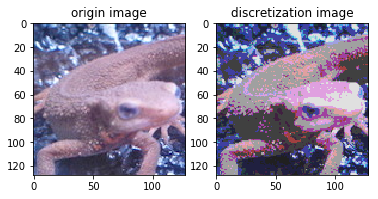

In [2]:
img = cv2.imread("gg.jpg")
img_origin = img.copy()
img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)

B = img[..., 0]
G = img[..., 1]
R = img[..., 2]
channels = [B, R, G]

for channel in channels:
    channel[(channel >= 0)   & (channel < 64)]  = 32
    channel[(channel >= 64)  & (channel < 128)] = 64
    channel[(channel >= 128) & (channel < 192)] = 160
    channel[(channel >= 192) & (channel < 256)] = 224

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.subplot(121)
plt.imshow(img_origin)
plt.title("origin image")
plt.subplot(122)
plt.imshow(img)
plt.title("discretization image")
plt.show()

### plt与opencv的显示差别
plt.imshow() 是以RGB格式显示

opencv读出的图是BGR格式，要用plt显示需要将bgr转换为rgb